# Euler on 1d SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''=========
generate 1d bm path
========='''

def bm_1d_path(time_grid):
    step_size = np.diff(time_grid)
    dw = np.random.normal(0, np.sqrt(step_size)) #bm increment
    w = np.append([0], np.cumsum(dw)) #bm path
    return w

In [3]:
'''==========
euler method on 1d sde
input:
    time grid
    sde_1d_param
==========='''

def euler_1d(grid, sde):
    #set SDE param
    x0 = sde['init_state']
    mu = sde['drift']
    sigma = sde['vol']
    
    #generate bm path
    w = bm_1d_path(grid)

    #initialize euler solution
    xh = x0 + np.zeros(grid.shape)
    #run euler
    for i in range(grid.size-1):
        dt = grid[i+1] - grid[i] #time step size
        dw = w[i+1] - w[i] #brownian increment
        xh[i+1] = xh[i] + mu(xh[i])*dt + sigma(xh[i])*dw #euler
        
    return xh
    

Test Euler method: 
We implement ordinary MC to find BSM call price, compare with exact price, see [bsm_formula](./bsm_formula.ipynb)

In [4]:
'''=========
sde param, option param
=========='''

sde_1d_param = {
    'init_state': 100.,
    'drift': lambda x: 0.0475*x, #drift function
    'vol': lambda x: 0.2*x #volatility function
}


vanilla_option = {
    'otype': 1, # 1: 'call'
                # -1: 'put'
    'strike': 110.0,
    'maturity': 1.0
}

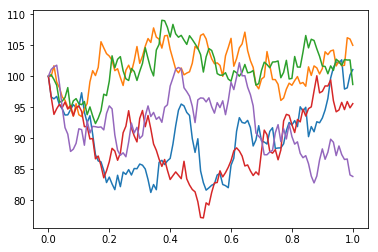

In [5]:
'''==========
plot euler paths
=========='''

time_grid = np.linspace(0,vanilla_option['maturity'],111)

for i in range(5):
    xh = euler_1d(time_grid,sde_1d_param)
    plt.plot(time_grid, xh)

In [6]:
'''
==========
option pricing based euler OMC
=========='''

r = sde_1d_param['drift'](1.)
k = vanilla_option['strike']
maturity = vanilla_option['maturity']

num_step = 10
time_grid = np.linspace(0, maturity, num_step+1)

num_path = 10000
terminal_price = [euler_1d(time_grid,sde_1d_param)[-1] for i in range(num_path)]

#compute call price
otype = 1
payoff = [np.max([0, (s - k)*otype]) for s in terminal_price]
call_value = np.exp(-r*maturity)*np.average(payoff)

#compute put price
otype = -1
payoff = [np.max([0, (s - k)*otype]) for s in terminal_price]
put_value = np.exp(-r*maturity)*np.average(payoff)

In [7]:
print('call price is ' + str(call_value))
print('put price is ' + str(put_value))

call price is 5.982947932539378
put price is 10.838750838839939
